In [4]:
import time

import numpy as np
from matplotlib import pyplot as plt
from numpy.linalg import LinAlgError
from scipy.io import loadmat
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


## Problems 1
a. A logistic regression class with Batch Gradient Descent, Stochastic Gradient Descent, and Newton's Method
as optimizers is implemented below.

In [14]:
class LR:
    def __init__(self, step_size=0.1, max_epochs=1000000000, stopping_threshold=0.01, optimizer='bgd'):
        self.step_size = step_size
        self.max_epochs = max_epochs
        self.d = 0
        self.weights = np.random.rand(self.d)
        self.optimizer = optimizer
        self.stopping_threshold = stopping_threshold
        self.step = 0

    def fit(self, X_train, y_train):
        n = X_train.shape[0]
        self.d = X_train.shape[1] + 1
        self.weights = np.random.rand(self.d)
        X_train = np.insert(X_train, 0, np.ones(n), axis=1)
        for _ in range(self.max_epochs):
            self.step += 1
            if self.optimizer == 'bgd':
                y_hat = LR.logistic_function(np.einsum('ij,j->i', X_train, self.weights))
                grad = self.compute_gradient(X_train, y_train, y_hat)
                self.gradient_descent(grad)
            elif self.optimizer == 'newton':
                y_hat = LR.logistic_function(np.einsum('ij,j->i', X_train, self.weights))
                grad = self.compute_gradient(X_train, y_train, y_hat)
                hessian = self.compute_hessian(X_train, y_hat)
                self.newton_method(grad, hessian)
            elif self.optimizer == 'sgd':
                random_indices = np.random.choice(n, size=1)
                sample = np.reshape(X_train[random_indices], (-1, self.d))
                y_hat = LR.logistic_function(np.einsum('ij,j->i', sample, self.weights))
                grad = self.compute_gradient(sample, y_train[random_indices], y_hat)
                self.gradient_descent(grad)
            else:
                raise Exception("Optimizer Invalid")

            grad_norm = np.sqrt(np.einsum('i,i->', grad, grad))
            if self.step % 1000000 == 0:
                print("Gradient Norm after {} iterations: {}".format(self.step, grad_norm))
            if grad_norm < self.stopping_threshold:
                break

    def predict(self, X_test):
        X_test = np.insert(X_test, 0, np.ones(X_test.shape[0]), axis=1)
        return np.heaviside(np.einsum('ij,j->i', X_test, self.weights), 1)

    def gradient_descent(self, grad):
        self.weights += self.step_size * grad

    def newton_method(self, grad, hessian):
        self.weights += np.einsum('ij,j->i', np.linalg.inv(hessian), grad)

    @staticmethod
    def compute_gradient(X_train, y_train, y_hat):
        return np.einsum('ij,i->j', X_train, y_train - y_hat)

    @staticmethod
    def compute_hessian(X_train, y_hat):
        s_mat = np.diag(np.multiply(y_hat, 1 - y_hat))
        return np.einsum('ij,jk,kv->iv', X_train.transpose(), s_mat, X_train)

    @staticmethod
    def logistic_function(x):
        return 1 / (1 + np.exp(-x))

## Problem 1
b. We test our implementation of Logistic Regression with BGD on four given synthesis datasets below.
We experiment with values of step size in [0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1].
We don't stop training unless max_epochs == 10^7 iterations are passed or the norm of the gradient falls below a
threshold value. The threshold value is also experimented with and [0.002, 0.005, 0.008, 0.01] are tested.
The less athe threshold value is, the longer it takes to converge and usually the better performance.
The final classifier is plotted for each setting.  The final training accuracy is reported.
Please note that the algorithm could be stopped when training accuracy is equal to 1.0, but we don't stop
to make the final weights closer to the global minimum, to ensure better generalization.

Classification Results for Synthetic Dataset 1

Gradient Norm after 1000000 iterations: 0.011715073655553805
Gradient Norm after 2000000 iterations: 0.006636408698422476
Gradient Norm after 3000000 iterations: 0.004680572351979102
Gradient Norm after 4000000 iterations: 0.0036269286865580324
Gradient Norm after 5000000 iterations: 0.002964543306489968
Gradient Norm after 6000000 iterations: 0.002508482425025786
Gradient Norm after 7000000 iterations: 0.0021749026488008744


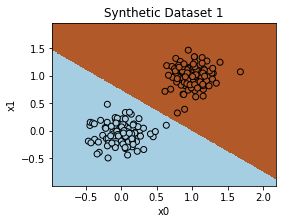

Logistic Regression with step_size: 0.0005, stopping_criterion: 0.002 after 7658831 iterations and 197214 milli seconds, training accuracy: 1.0


Gradient Norm after 1000000 iterations: 0.011715073655553805
Gradient Norm after 2000000 iterations: 0.006636408698422476


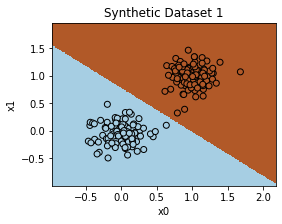

Logistic Regression with step_size: 0.0005, stopping_criterion: 0.005 after 2781621 iterations and 77668 milli seconds, training accuracy: 1.0


Gradient Norm after 1000000 iterations: 0.011715073655553805


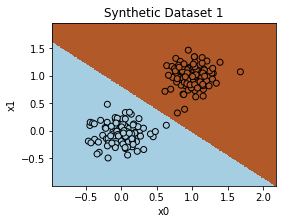

Logistic Regression with step_size: 0.0005, stopping_criterion: 0.008 after 1599890 iterations and 46026 milli seconds, training accuracy: 1.0


Gradient Norm after 1000000 iterations: 0.011715073655553805


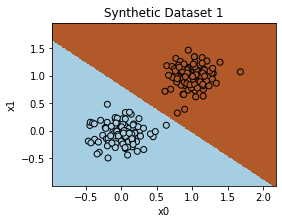

Logistic Regression with step_size: 0.0005, stopping_criterion: 0.01 after 1218177 iterations and 34254 milli seconds, training accuracy: 1.0


Gradient Norm after 1000000 iterations: 0.006636398581297635
Gradient Norm after 2000000 iterations: 0.0036269254961301014
Gradient Norm after 3000000 iterations: 0.0025084808379647293


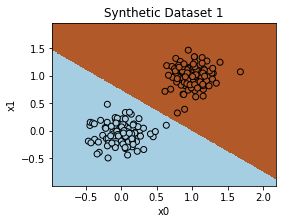

Logistic Regression with step_size: 0.001, stopping_criterion: 0.002 after 3829414 iterations and 96352 milli seconds, training accuracy: 1.0


Gradient Norm after 1000000 iterations: 0.006636398581297635


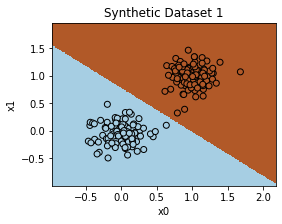

Logistic Regression with step_size: 0.001, stopping_criterion: 0.005 after 1390809 iterations and 33154 milli seconds, training accuracy: 1.0




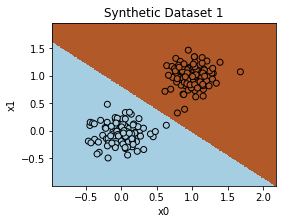

Logistic Regression with step_size: 0.001, stopping_criterion: 0.008 after 799943 iterations and 19058 milli seconds, training accuracy: 1.0




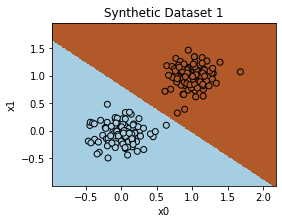

Logistic Regression with step_size: 0.001, stopping_criterion: 0.01 after 609087 iterations and 14623 milli seconds, training accuracy: 1.0




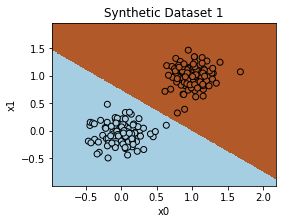

Logistic Regression with step_size: 0.005, stopping_criterion: 0.002 after 765880 iterations and 18236 milli seconds, training accuracy: 1.0




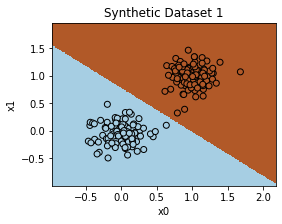

Logistic Regression with step_size: 0.005, stopping_criterion: 0.005 after 278159 iterations and 6673 milli seconds, training accuracy: 1.0




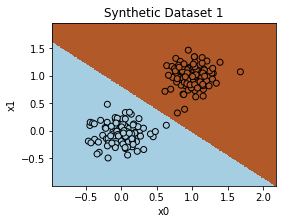

Logistic Regression with step_size: 0.005, stopping_criterion: 0.008 after 159986 iterations and 3814 milli seconds, training accuracy: 1.0




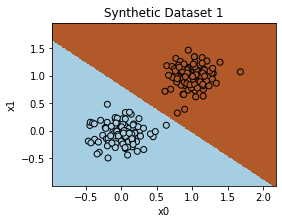

Logistic Regression with step_size: 0.005, stopping_criterion: 0.01 after 121815 iterations and 2912 milli seconds, training accuracy: 1.0




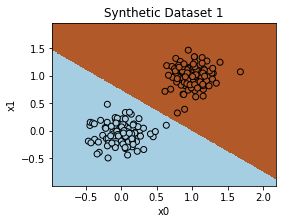

Logistic Regression with step_size: 0.01, stopping_criterion: 0.002 after 382938 iterations and 9142 milli seconds, training accuracy: 1.0




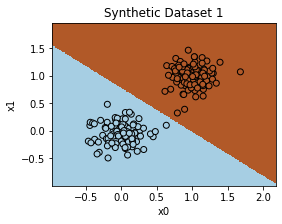

Logistic Regression with step_size: 0.01, stopping_criterion: 0.005 after 139078 iterations and 3383 milli seconds, training accuracy: 1.0




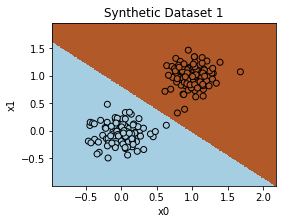

Logistic Regression with step_size: 0.01, stopping_criterion: 0.008 after 79992 iterations and 1929 milli seconds, training accuracy: 1.0




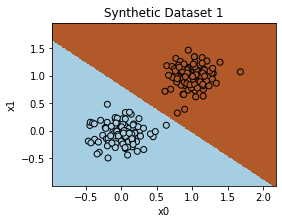

Logistic Regression with step_size: 0.01, stopping_criterion: 0.01 after 60906 iterations and 1479 milli seconds, training accuracy: 1.0




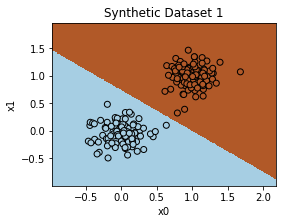

Logistic Regression with step_size: 0.05, stopping_criterion: 0.002 after 76583 iterations and 1846 milli seconds, training accuracy: 1.0




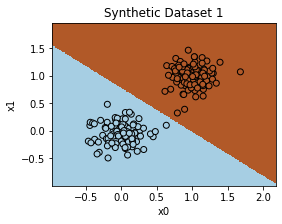

Logistic Regression with step_size: 0.05, stopping_criterion: 0.005 after 27811 iterations and 733 milli seconds, training accuracy: 1.0




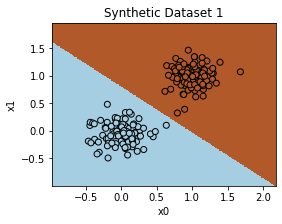

Logistic Regression with step_size: 0.05, stopping_criterion: 0.008 after 15994 iterations and 445 milli seconds, training accuracy: 1.0




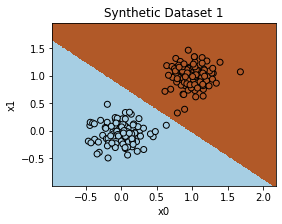

Logistic Regression with step_size: 0.05, stopping_criterion: 0.01 after 12177 iterations and 318 milli seconds, training accuracy: 1.0




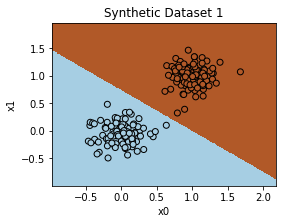

Logistic Regression with step_size: 0.1, stopping_criterion: 0.002 after 38275 iterations and 957 milli seconds, training accuracy: 1.0




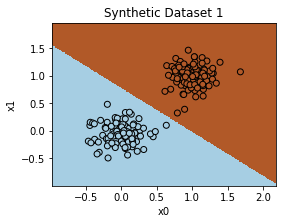

Logistic Regression with step_size: 0.1, stopping_criterion: 0.005 after 13890 iterations and 365 milli seconds, training accuracy: 1.0




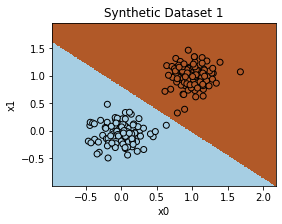

Logistic Regression with step_size: 0.1, stopping_criterion: 0.008 after 7982 iterations and 203 milli seconds, training accuracy: 1.0




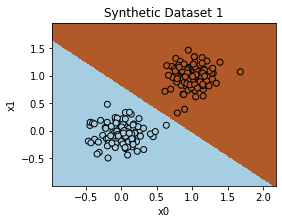

Logistic Regression with step_size: 0.1, stopping_criterion: 0.01 after 6073 iterations and 161 milli seconds, training accuracy: 1.0




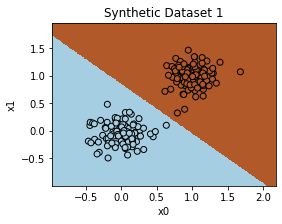

Logistic Regression with step_size: 0.5, stopping_criterion: 0.002 after 2157 iterations and 60 milli seconds, training accuracy: 1.0




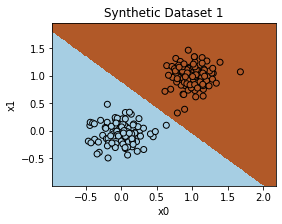

Logistic Regression with step_size: 0.5, stopping_criterion: 0.005 after 81 iterations and 4 milli seconds, training accuracy: 1.0




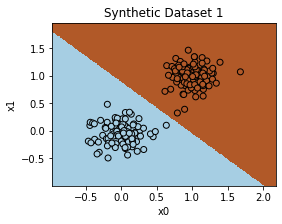

Logistic Regression with step_size: 0.5, stopping_criterion: 0.008 after 49 iterations and 2 milli seconds, training accuracy: 1.0




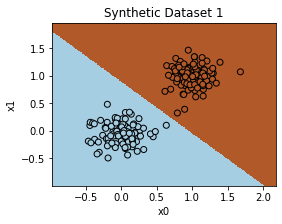

Logistic Regression with step_size: 0.5, stopping_criterion: 0.01 after 35 iterations and 2 milli seconds, training accuracy: 1.0




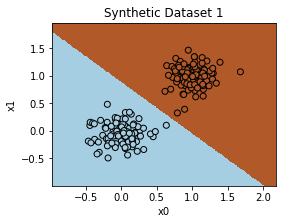

Logistic Regression with step_size: 1, stopping_criterion: 0.002 after 3 iterations and 0 milli seconds, training accuracy: 1.0




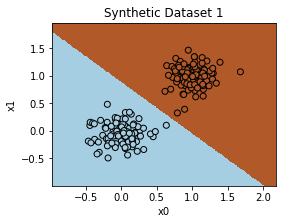

Logistic Regression with step_size: 1, stopping_criterion: 0.005 after 3 iterations and 0 milli seconds, training accuracy: 1.0




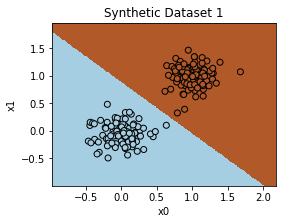

Logistic Regression with step_size: 1, stopping_criterion: 0.008 after 3 iterations and 0 milli seconds, training accuracy: 1.0




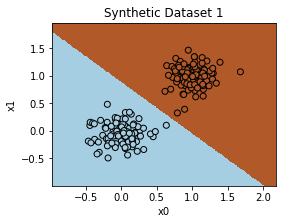

Logistic Regression with step_size: 1, stopping_criterion: 0.01 after 3 iterations and 0 milli seconds, training accuracy: 1.0








Classification Results for Synthetic Dataset 2



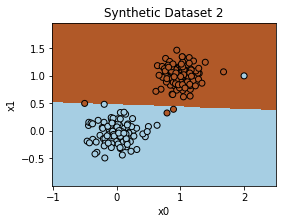

Logistic Regression with step_size: 0.0005, stopping_criterion: 0.002 after 97346 iterations and 2371 milli seconds, training accuracy: 0.98




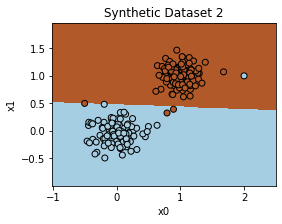

Logistic Regression with step_size: 0.0005, stopping_criterion: 0.005 after 81382 iterations and 1965 milli seconds, training accuracy: 0.98




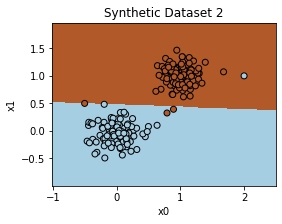

Logistic Regression with step_size: 0.0005, stopping_criterion: 0.008 after 73233 iterations and 1783 milli seconds, training accuracy: 0.98




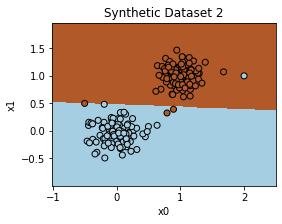

Logistic Regression with step_size: 0.0005, stopping_criterion: 0.01 after 69379 iterations and 1719 milli seconds, training accuracy: 0.98




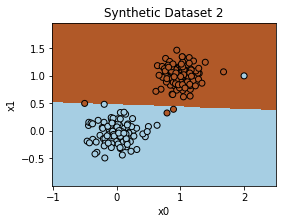

Logistic Regression with step_size: 0.001, stopping_criterion: 0.002 after 48672 iterations and 1198 milli seconds, training accuracy: 0.98




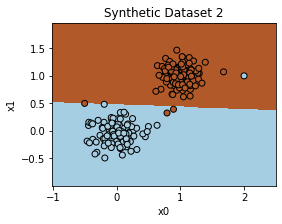

Logistic Regression with step_size: 0.001, stopping_criterion: 0.005 after 40690 iterations and 1018 milli seconds, training accuracy: 0.98




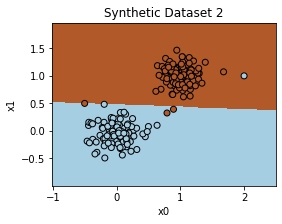

Logistic Regression with step_size: 0.001, stopping_criterion: 0.008 after 36616 iterations and 896 milli seconds, training accuracy: 0.98




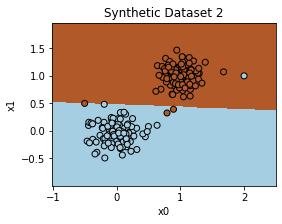

Logistic Regression with step_size: 0.001, stopping_criterion: 0.01 after 34689 iterations and 858 milli seconds, training accuracy: 0.98




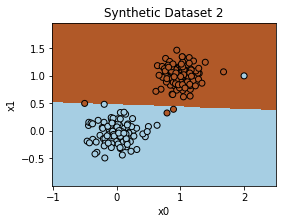

Logistic Regression with step_size: 0.005, stopping_criterion: 0.002 after 9732 iterations and 258 milli seconds, training accuracy: 0.98




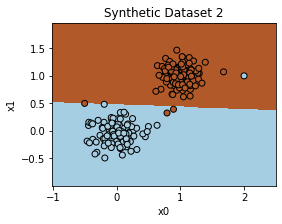

Logistic Regression with step_size: 0.005, stopping_criterion: 0.005 after 8136 iterations and 215 milli seconds, training accuracy: 0.98




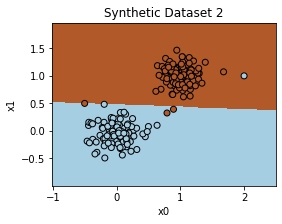

Logistic Regression with step_size: 0.005, stopping_criterion: 0.008 after 7322 iterations and 196 milli seconds, training accuracy: 0.98




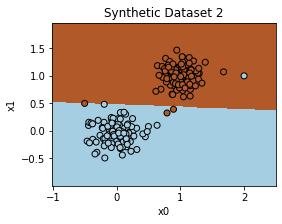

Logistic Regression with step_size: 0.005, stopping_criterion: 0.01 after 6936 iterations and 186 milli seconds, training accuracy: 0.98




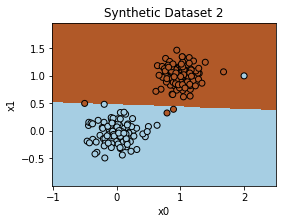

Logistic Regression with step_size: 0.01, stopping_criterion: 0.002 after 4865 iterations and 137 milli seconds, training accuracy: 0.98




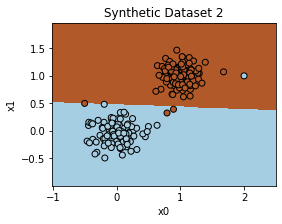

Logistic Regression with step_size: 0.01, stopping_criterion: 0.005 after 4067 iterations and 115 milli seconds, training accuracy: 0.98




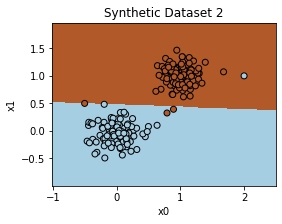

Logistic Regression with step_size: 0.01, stopping_criterion: 0.008 after 3660 iterations and 98 milli seconds, training accuracy: 0.98




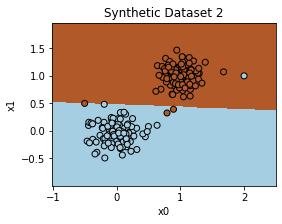

Logistic Regression with step_size: 0.01, stopping_criterion: 0.01 after 3467 iterations and 98 milli seconds, training accuracy: 0.98




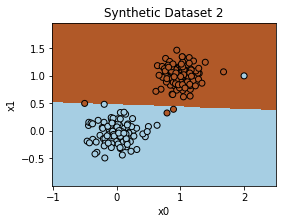

Logistic Regression with step_size: 0.05, stopping_criterion: 0.002 after 971 iterations and 29 milli seconds, training accuracy: 0.98




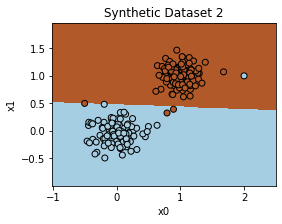

Logistic Regression with step_size: 0.05, stopping_criterion: 0.005 after 811 iterations and 29 milli seconds, training accuracy: 0.98




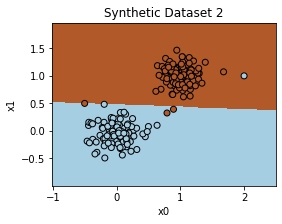

Logistic Regression with step_size: 0.05, stopping_criterion: 0.008 after 730 iterations and 21 milli seconds, training accuracy: 0.98




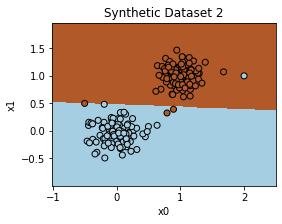

Logistic Regression with step_size: 0.05, stopping_criterion: 0.01 after 692 iterations and 21 milli seconds, training accuracy: 0.98




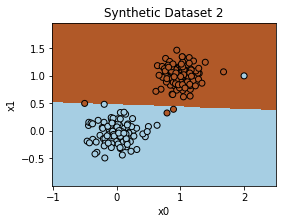

Logistic Regression with step_size: 0.1, stopping_criterion: 0.002 after 481 iterations and 18 milli seconds, training accuracy: 0.98




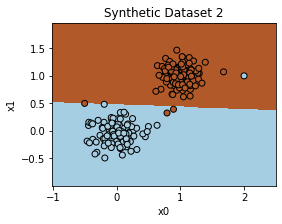

Logistic Regression with step_size: 0.1, stopping_criterion: 0.005 after 402 iterations and 15 milli seconds, training accuracy: 0.98




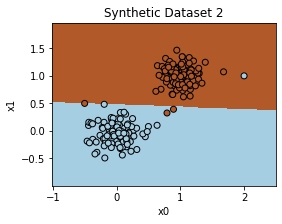

Logistic Regression with step_size: 0.1, stopping_criterion: 0.008 after 362 iterations and 13 milli seconds, training accuracy: 0.98




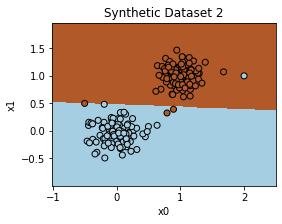

Logistic Regression with step_size: 0.1, stopping_criterion: 0.01 after 342 iterations and 13 milli seconds, training accuracy: 0.98




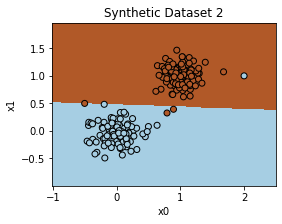

Logistic Regression with step_size: 0.5, stopping_criterion: 0.002 after 160 iterations and 5 milli seconds, training accuracy: 0.98




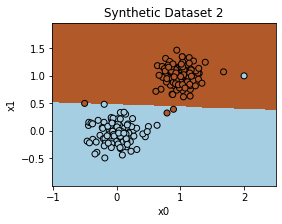

Logistic Regression with step_size: 0.5, stopping_criterion: 0.005 after 145 iterations and 6 milli seconds, training accuracy: 0.98




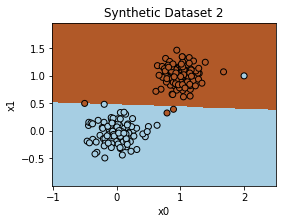

Logistic Regression with step_size: 0.5, stopping_criterion: 0.008 after 136 iterations and 5 milli seconds, training accuracy: 0.98




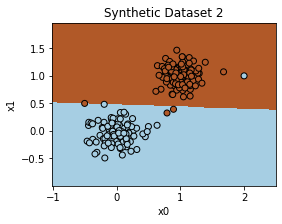

Logistic Regression with step_size: 0.5, stopping_criterion: 0.01 after 133 iterations and 5 milli seconds, training accuracy: 0.98


Gradient Norm after 1000000 iterations: 171.89543807125546
Gradient Norm after 2000000 iterations: 2.313304531564183
Gradient Norm after 3000000 iterations: 0.7350894833930802
Gradient Norm after 4000000 iterations: 0.2577069717950982
Gradient Norm after 5000000 iterations: 0.6659358435602227
Gradient Norm after 6000000 iterations: 0.7141994712008108
Gradient Norm after 7000000 iterations: 0.7127237553281802
Gradient Norm after 8000000 iterations: 0.374309714677737
Gradient Norm after 9000000 iterations: 3.3658280738357775
Gradient Norm after 10000000 iterations: 0.914024553438385


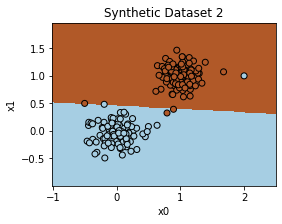

Logistic Regression with step_size: 1, stopping_criterion: 0.002 after 10000000 iterations and 262177 milli seconds, training accuracy: 0.98


Gradient Norm after 1000000 iterations: 171.89543807125546
Gradient Norm after 2000000 iterations: 2.313304531564183
Gradient Norm after 3000000 iterations: 0.7350894833930802
Gradient Norm after 4000000 iterations: 0.2577069717950982
Gradient Norm after 5000000 iterations: 0.6659358435602227
Gradient Norm after 6000000 iterations: 0.7141994712008108
Gradient Norm after 7000000 iterations: 0.7127237553281802
Gradient Norm after 8000000 iterations: 0.374309714677737
Gradient Norm after 9000000 iterations: 3.3658280738357775
Gradient Norm after 10000000 iterations: 0.914024553438385


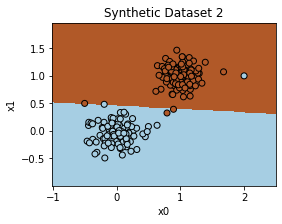

Logistic Regression with step_size: 1, stopping_criterion: 0.005 after 10000000 iterations and 259411 milli seconds, training accuracy: 0.98


Gradient Norm after 1000000 iterations: 171.89543807125546
Gradient Norm after 2000000 iterations: 2.313304531564183
Gradient Norm after 3000000 iterations: 0.7350894833930802
Gradient Norm after 4000000 iterations: 0.2577069717950982
Gradient Norm after 5000000 iterations: 0.6659358435602227
Gradient Norm after 6000000 iterations: 0.7141994712008108
Gradient Norm after 7000000 iterations: 0.7127237553281802
Gradient Norm after 8000000 iterations: 0.374309714677737
Gradient Norm after 9000000 iterations: 3.3658280738357775
Gradient Norm after 10000000 iterations: 0.914024553438385


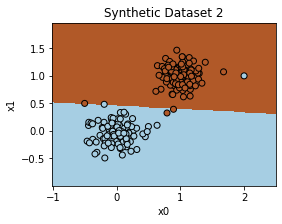

Logistic Regression with step_size: 1, stopping_criterion: 0.008 after 10000000 iterations and 267489 milli seconds, training accuracy: 0.98


Gradient Norm after 1000000 iterations: 171.89543807125546
Gradient Norm after 2000000 iterations: 2.313304531564183
Gradient Norm after 3000000 iterations: 0.7350894833930802
Gradient Norm after 4000000 iterations: 0.2577069717950982
Gradient Norm after 5000000 iterations: 0.6659358435602227
Gradient Norm after 6000000 iterations: 0.7141994712008108
Gradient Norm after 7000000 iterations: 0.7127237553281802
Gradient Norm after 8000000 iterations: 0.374309714677737
Gradient Norm after 9000000 iterations: 3.3658280738357775
Gradient Norm after 10000000 iterations: 0.914024553438385


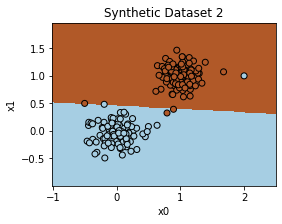

Logistic Regression with step_size: 1, stopping_criterion: 0.01 after 10000000 iterations and 275405 milli seconds, training accuracy: 0.98








Classification Results for Synthetic Dataset 3



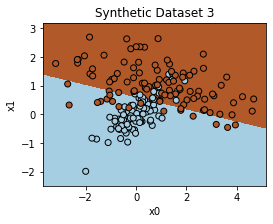

Logistic Regression with step_size: 0.0005, stopping_criterion: 0.002 after 4001 iterations and 122 milli seconds, training accuracy: 0.825




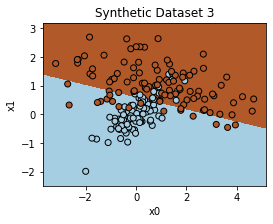

Logistic Regression with step_size: 0.0005, stopping_criterion: 0.005 after 3546 iterations and 103 milli seconds, training accuracy: 0.825




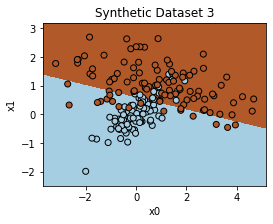

Logistic Regression with step_size: 0.0005, stopping_criterion: 0.008 after 3314 iterations and 85 milli seconds, training accuracy: 0.825




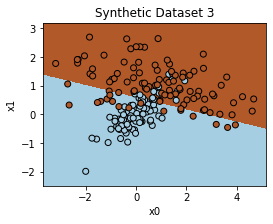

Logistic Regression with step_size: 0.0005, stopping_criterion: 0.01 after 3203 iterations and 85 milli seconds, training accuracy: 0.825




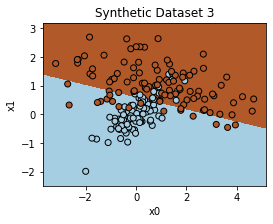

Logistic Regression with step_size: 0.001, stopping_criterion: 0.002 after 1999 iterations and 50 milli seconds, training accuracy: 0.825




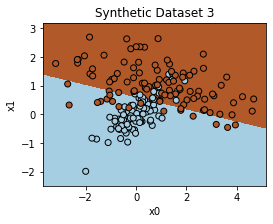

Logistic Regression with step_size: 0.001, stopping_criterion: 0.005 after 1772 iterations and 45 milli seconds, training accuracy: 0.825




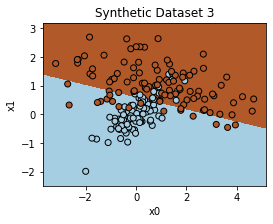

Logistic Regression with step_size: 0.001, stopping_criterion: 0.008 after 1655 iterations and 44 milli seconds, training accuracy: 0.825




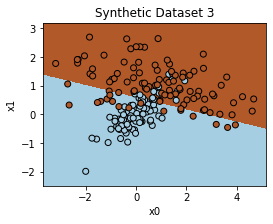

Logistic Regression with step_size: 0.001, stopping_criterion: 0.01 after 1600 iterations and 58 milli seconds, training accuracy: 0.825




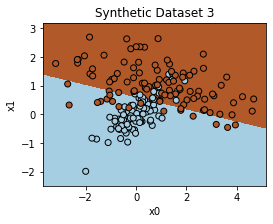

Logistic Regression with step_size: 0.005, stopping_criterion: 0.002 after 397 iterations and 13 milli seconds, training accuracy: 0.825




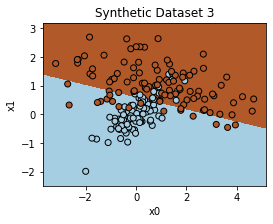

Logistic Regression with step_size: 0.005, stopping_criterion: 0.005 after 352 iterations and 12 milli seconds, training accuracy: 0.825




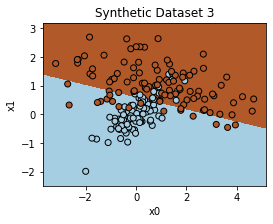

Logistic Regression with step_size: 0.005, stopping_criterion: 0.008 after 329 iterations and 11 milli seconds, training accuracy: 0.825




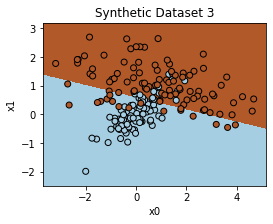

Logistic Regression with step_size: 0.005, stopping_criterion: 0.01 after 318 iterations and 8 milli seconds, training accuracy: 0.825




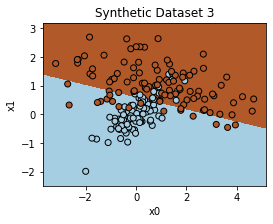

Logistic Regression with step_size: 0.01, stopping_criterion: 0.002 after 197 iterations and 7 milli seconds, training accuracy: 0.825




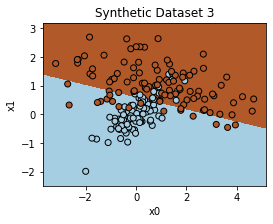

Logistic Regression with step_size: 0.01, stopping_criterion: 0.005 after 174 iterations and 6 milli seconds, training accuracy: 0.825




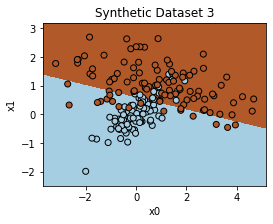

Logistic Regression with step_size: 0.01, stopping_criterion: 0.008 after 163 iterations and 5 milli seconds, training accuracy: 0.825




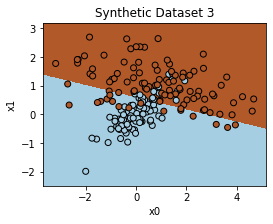

Logistic Regression with step_size: 0.01, stopping_criterion: 0.01 after 158 iterations and 5 milli seconds, training accuracy: 0.825


Gradient Norm after 1000000 iterations: 40.90599097275905
Gradient Norm after 2000000 iterations: 40.90599097275905
Gradient Norm after 3000000 iterations: 40.90599097275905
Gradient Norm after 4000000 iterations: 40.90599097275905
Gradient Norm after 5000000 iterations: 40.90599097275905
Gradient Norm after 6000000 iterations: 40.90599097275905
Gradient Norm after 7000000 iterations: 40.90599097275905
Gradient Norm after 8000000 iterations: 40.90599097275905
Gradient Norm after 9000000 iterations: 40.90599097275905
Gradient Norm after 10000000 iterations: 40.90599097275905


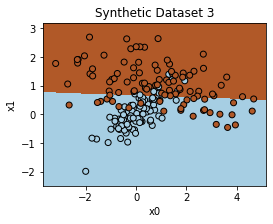

Logistic Regression with step_size: 0.05, stopping_criterion: 0.002 after 10000000 iterations and 237535 milli seconds, training accuracy: 0.795


Gradient Norm after 1000000 iterations: 40.90599097275905
Gradient Norm after 2000000 iterations: 40.90599097275905
Gradient Norm after 3000000 iterations: 40.90599097275905
Gradient Norm after 4000000 iterations: 40.90599097275905
Gradient Norm after 5000000 iterations: 40.90599097275905
Gradient Norm after 6000000 iterations: 40.90599097275905
Gradient Norm after 7000000 iterations: 40.90599097275905
Gradient Norm after 8000000 iterations: 40.90599097275905
Gradient Norm after 9000000 iterations: 40.90599097275905
Gradient Norm after 10000000 iterations: 40.90599097275905


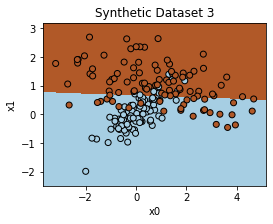

Logistic Regression with step_size: 0.05, stopping_criterion: 0.005 after 10000000 iterations and 261943 milli seconds, training accuracy: 0.795


Gradient Norm after 1000000 iterations: 40.90599097275905
Gradient Norm after 2000000 iterations: 40.90599097275905
Gradient Norm after 3000000 iterations: 40.90599097275905
Gradient Norm after 4000000 iterations: 40.90599097275905
Gradient Norm after 5000000 iterations: 40.90599097275905
Gradient Norm after 6000000 iterations: 40.90599097275905
Gradient Norm after 7000000 iterations: 40.90599097275905
Gradient Norm after 8000000 iterations: 40.90599097275905
Gradient Norm after 9000000 iterations: 40.90599097275905
Gradient Norm after 10000000 iterations: 40.90599097275905


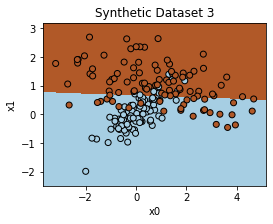

Logistic Regression with step_size: 0.05, stopping_criterion: 0.008 after 10000000 iterations and 260235 milli seconds, training accuracy: 0.795


Gradient Norm after 1000000 iterations: 40.90599097275905
Gradient Norm after 2000000 iterations: 40.90599097275905
Gradient Norm after 3000000 iterations: 40.90599097275905
Gradient Norm after 4000000 iterations: 40.90599097275905
Gradient Norm after 5000000 iterations: 40.90599097275905
Gradient Norm after 6000000 iterations: 40.90599097275905
Gradient Norm after 7000000 iterations: 40.90599097275905
Gradient Norm after 8000000 iterations: 40.90599097275905
Gradient Norm after 9000000 iterations: 40.90599097275905
Gradient Norm after 10000000 iterations: 40.90599097275905


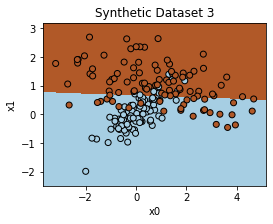

Logistic Regression with step_size: 0.05, stopping_criterion: 0.01 after 10000000 iterations and 235893 milli seconds, training accuracy: 0.795


Gradient Norm after 1000000 iterations: 64.74153466150418
Gradient Norm after 2000000 iterations: 62.39858756551223
Gradient Norm after 3000000 iterations: 49.20213974329768
Gradient Norm after 4000000 iterations: 64.40397197944804
Gradient Norm after 5000000 iterations: 96.62266744117804
Gradient Norm after 6000000 iterations: 20.420780451219155
Gradient Norm after 7000000 iterations: 62.690135318927666
Gradient Norm after 8000000 iterations: 10.889824831027843
Gradient Norm after 9000000 iterations: 63.132510354817626
Gradient Norm after 10000000 iterations: 7.248280811400384


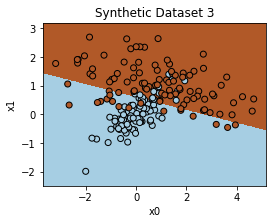

Logistic Regression with step_size: 0.1, stopping_criterion: 0.002 after 10000000 iterations and 236888 milli seconds, training accuracy: 0.825


Gradient Norm after 1000000 iterations: 64.74153466150418
Gradient Norm after 2000000 iterations: 62.39858756551223
Gradient Norm after 3000000 iterations: 49.20213974329768
Gradient Norm after 4000000 iterations: 64.40397197944804
Gradient Norm after 5000000 iterations: 96.62266744117804
Gradient Norm after 6000000 iterations: 20.420780451219155
Gradient Norm after 7000000 iterations: 62.690135318927666
Gradient Norm after 8000000 iterations: 10.889824831027843
Gradient Norm after 9000000 iterations: 63.132510354817626
Gradient Norm after 10000000 iterations: 7.248280811400384


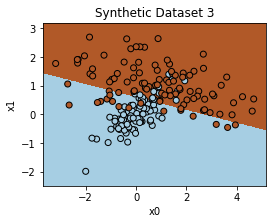

Logistic Regression with step_size: 0.1, stopping_criterion: 0.005 after 10000000 iterations and 239170 milli seconds, training accuracy: 0.825


Gradient Norm after 1000000 iterations: 64.74153466150418
Gradient Norm after 2000000 iterations: 62.39858756551223
Gradient Norm after 3000000 iterations: 49.20213974329768
Gradient Norm after 4000000 iterations: 64.40397197944804
Gradient Norm after 5000000 iterations: 96.62266744117804
Gradient Norm after 6000000 iterations: 20.420780451219155
Gradient Norm after 7000000 iterations: 62.690135318927666
Gradient Norm after 8000000 iterations: 10.889824831027843
Gradient Norm after 9000000 iterations: 63.132510354817626
Gradient Norm after 10000000 iterations: 7.248280811400384


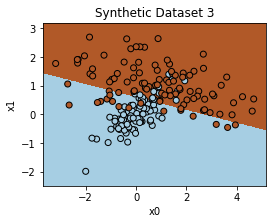

Logistic Regression with step_size: 0.1, stopping_criterion: 0.008 after 10000000 iterations and 238715 milli seconds, training accuracy: 0.825


Gradient Norm after 1000000 iterations: 64.74153466150418
Gradient Norm after 2000000 iterations: 62.39858756551223
Gradient Norm after 3000000 iterations: 49.20213974329768
Gradient Norm after 4000000 iterations: 64.40397197944804
Gradient Norm after 5000000 iterations: 96.62266744117804
Gradient Norm after 6000000 iterations: 20.420780451219155
Gradient Norm after 7000000 iterations: 62.690135318927666
Gradient Norm after 8000000 iterations: 10.889824831027843
Gradient Norm after 9000000 iterations: 63.132510354817626
Gradient Norm after 10000000 iterations: 7.248280811400384


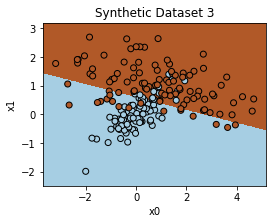

Logistic Regression with step_size: 0.1, stopping_criterion: 0.01 after 10000000 iterations and 236973 milli seconds, training accuracy: 0.825


Gradient Norm after 1000000 iterations: 74.03943080706811
Gradient Norm after 2000000 iterations: 47.65080618516012
Gradient Norm after 3000000 iterations: 95.53965245343953
Gradient Norm after 4000000 iterations: 40.72738394829125
Gradient Norm after 5000000 iterations: 114.76384182025771
Gradient Norm after 6000000 iterations: 63.162546453227634
Gradient Norm after 7000000 iterations: 114.065395797672
Gradient Norm after 8000000 iterations: 67.74121742845806
Gradient Norm after 9000000 iterations: 21.279109196245795
Gradient Norm after 10000000 iterations: 44.02586932872264


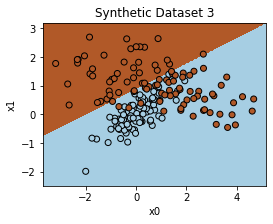

Logistic Regression with step_size: 0.5, stopping_criterion: 0.002 after 10000000 iterations and 238072 milli seconds, training accuracy: 0.705


Gradient Norm after 1000000 iterations: 74.03943080706811
Gradient Norm after 2000000 iterations: 47.65080618516012
Gradient Norm after 3000000 iterations: 95.53965245343953
Gradient Norm after 4000000 iterations: 40.72738394829125
Gradient Norm after 5000000 iterations: 114.76384182025771
Gradient Norm after 6000000 iterations: 63.162546453227634
Gradient Norm after 7000000 iterations: 114.065395797672
Gradient Norm after 8000000 iterations: 67.74121742845806
Gradient Norm after 9000000 iterations: 21.279109196245795
Gradient Norm after 10000000 iterations: 44.02586932872264


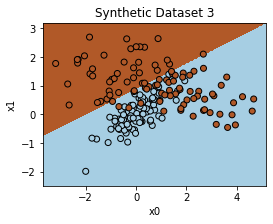

Logistic Regression with step_size: 0.5, stopping_criterion: 0.005 after 10000000 iterations and 240730 milli seconds, training accuracy: 0.705


Gradient Norm after 1000000 iterations: 74.03943080706811
Gradient Norm after 2000000 iterations: 47.65080618516012
Gradient Norm after 3000000 iterations: 95.53965245343953
Gradient Norm after 4000000 iterations: 40.72738394829125
Gradient Norm after 5000000 iterations: 114.76384182025771
Gradient Norm after 6000000 iterations: 63.162546453227634
Gradient Norm after 7000000 iterations: 114.065395797672
Gradient Norm after 8000000 iterations: 67.74121742845806
Gradient Norm after 9000000 iterations: 21.279109196245795
Gradient Norm after 10000000 iterations: 44.02586932872264


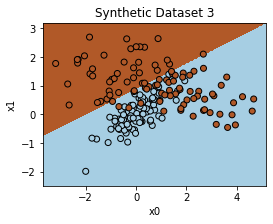

Logistic Regression with step_size: 0.5, stopping_criterion: 0.008 after 10000000 iterations and 278688 milli seconds, training accuracy: 0.705


Gradient Norm after 1000000 iterations: 74.03943080706811
Gradient Norm after 2000000 iterations: 47.65080618516012
Gradient Norm after 3000000 iterations: 95.53965245343953
Gradient Norm after 4000000 iterations: 40.72738394829125
Gradient Norm after 5000000 iterations: 114.76384182025771
Gradient Norm after 6000000 iterations: 63.162546453227634
Gradient Norm after 7000000 iterations: 114.065395797672
Gradient Norm after 8000000 iterations: 67.74121742845806
Gradient Norm after 9000000 iterations: 21.279109196245795
Gradient Norm after 10000000 iterations: 44.02586932872264


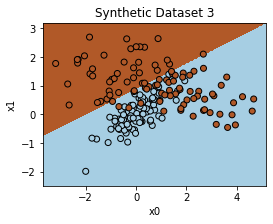

Logistic Regression with step_size: 0.5, stopping_criterion: 0.01 after 10000000 iterations and 266035 milli seconds, training accuracy: 0.705


Gradient Norm after 1000000 iterations: 68.17128032451099
Gradient Norm after 2000000 iterations: 73.43150921612799
Gradient Norm after 3000000 iterations: 60.27623375415843
Gradient Norm after 4000000 iterations: 29.240125679542384
Gradient Norm after 5000000 iterations: 64.23467682012479
Gradient Norm after 6000000 iterations: 71.12086106189483
Gradient Norm after 7000000 iterations: 16.036472004696623
Gradient Norm after 8000000 iterations: 31.247643204046028
Gradient Norm after 9000000 iterations: 65.60012462304213
Gradient Norm after 10000000 iterations: 32.955449351426175


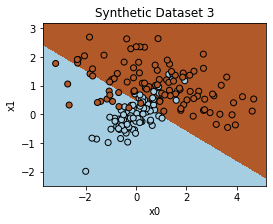

Logistic Regression with step_size: 1, stopping_criterion: 0.002 after 10000000 iterations and 260628 milli seconds, training accuracy: 0.795


Gradient Norm after 1000000 iterations: 68.17128032451099
Gradient Norm after 2000000 iterations: 73.43150921612799
Gradient Norm after 3000000 iterations: 60.27623375415843
Gradient Norm after 4000000 iterations: 29.240125679542384
Gradient Norm after 5000000 iterations: 64.23467682012479
Gradient Norm after 6000000 iterations: 71.12086106189483
Gradient Norm after 7000000 iterations: 16.036472004696623
Gradient Norm after 8000000 iterations: 31.247643204046028
Gradient Norm after 9000000 iterations: 65.60012462304213
Gradient Norm after 10000000 iterations: 32.955449351426175


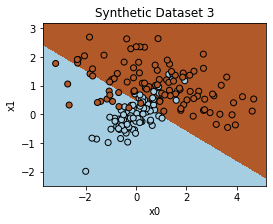

Logistic Regression with step_size: 1, stopping_criterion: 0.005 after 10000000 iterations and 243387 milli seconds, training accuracy: 0.795


Gradient Norm after 1000000 iterations: 68.17128032451099
Gradient Norm after 2000000 iterations: 73.43150921612799
Gradient Norm after 3000000 iterations: 60.27623375415843
Gradient Norm after 4000000 iterations: 29.240125679542384
Gradient Norm after 5000000 iterations: 64.23467682012479
Gradient Norm after 6000000 iterations: 71.12086106189483
Gradient Norm after 7000000 iterations: 16.036472004696623
Gradient Norm after 8000000 iterations: 31.247643204046028
Gradient Norm after 9000000 iterations: 65.60012462304213
Gradient Norm after 10000000 iterations: 32.955449351426175


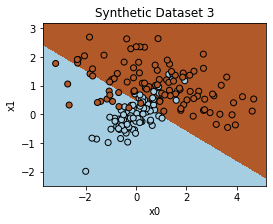

Logistic Regression with step_size: 1, stopping_criterion: 0.008 after 10000000 iterations and 251784 milli seconds, training accuracy: 0.795


Gradient Norm after 1000000 iterations: 68.17128032451099
Gradient Norm after 2000000 iterations: 73.43150921612799
Gradient Norm after 3000000 iterations: 60.27623375415843
Gradient Norm after 4000000 iterations: 29.240125679542384
Gradient Norm after 5000000 iterations: 64.23467682012479
Gradient Norm after 6000000 iterations: 71.12086106189483
Gradient Norm after 7000000 iterations: 16.036472004696623
Gradient Norm after 8000000 iterations: 31.247643204046028
Gradient Norm after 9000000 iterations: 65.60012462304213
Gradient Norm after 10000000 iterations: 32.955449351426175


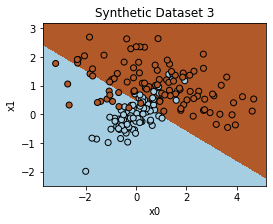

Logistic Regression with step_size: 1, stopping_criterion: 0.01 after 10000000 iterations and 238248 milli seconds, training accuracy: 0.795








Classification Results for Synthetic Dataset 4



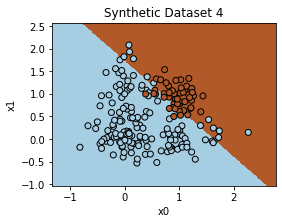

Logistic Regression with step_size: 0.0005, stopping_criterion: 0.002 after 41062 iterations and 1006 milli seconds, training accuracy: 0.885




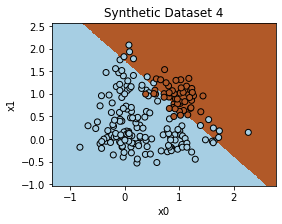

Logistic Regression with step_size: 0.0005, stopping_criterion: 0.005 after 35080 iterations and 870 milli seconds, training accuracy: 0.885




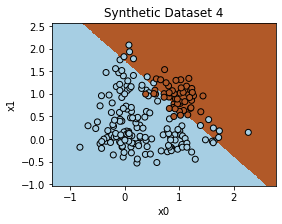

Logistic Regression with step_size: 0.0005, stopping_criterion: 0.008 after 32020 iterations and 796 milli seconds, training accuracy: 0.885




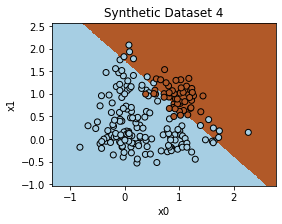

Logistic Regression with step_size: 0.0005, stopping_criterion: 0.01 after 30569 iterations and 730 milli seconds, training accuracy: 0.885




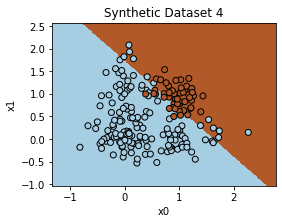

Logistic Regression with step_size: 0.001, stopping_criterion: 0.002 after 20529 iterations and 565 milli seconds, training accuracy: 0.885




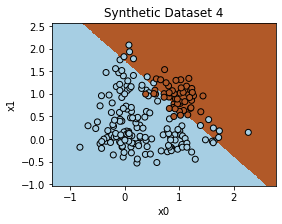

Logistic Regression with step_size: 0.001, stopping_criterion: 0.005 after 17539 iterations and 477 milli seconds, training accuracy: 0.885




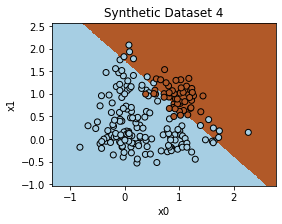

Logistic Regression with step_size: 0.001, stopping_criterion: 0.008 after 16009 iterations and 403 milli seconds, training accuracy: 0.885




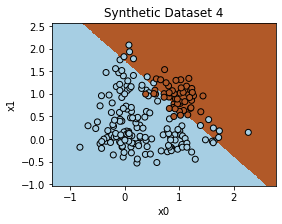

Logistic Regression with step_size: 0.001, stopping_criterion: 0.01 after 15283 iterations and 371 milli seconds, training accuracy: 0.885




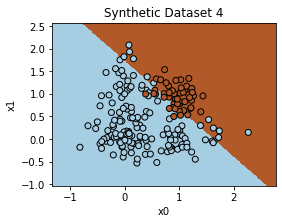

Logistic Regression with step_size: 0.005, stopping_criterion: 0.002 after 4103 iterations and 119 milli seconds, training accuracy: 0.885




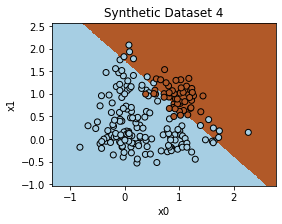

Logistic Regression with step_size: 0.005, stopping_criterion: 0.005 after 3505 iterations and 85 milli seconds, training accuracy: 0.885




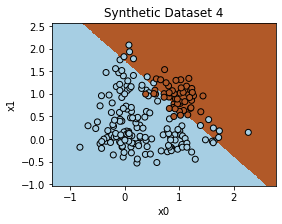

Logistic Regression with step_size: 0.005, stopping_criterion: 0.008 after 3200 iterations and 93 milli seconds, training accuracy: 0.885




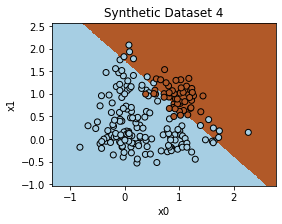

Logistic Regression with step_size: 0.005, stopping_criterion: 0.01 after 3055 iterations and 87 milli seconds, training accuracy: 0.885




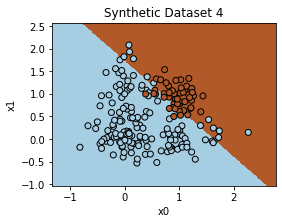

Logistic Regression with step_size: 0.01, stopping_criterion: 0.002 after 2050 iterations and 65 milli seconds, training accuracy: 0.885




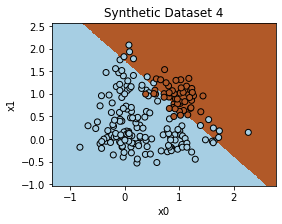

Logistic Regression with step_size: 0.01, stopping_criterion: 0.005 after 1751 iterations and 59 milli seconds, training accuracy: 0.885




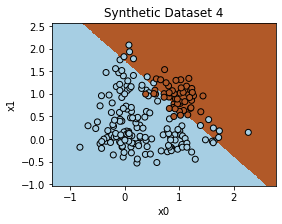

Logistic Regression with step_size: 0.01, stopping_criterion: 0.008 after 1598 iterations and 53 milli seconds, training accuracy: 0.885




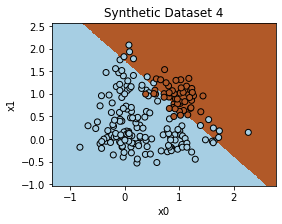

Logistic Regression with step_size: 0.01, stopping_criterion: 0.01 after 1526 iterations and 37 milli seconds, training accuracy: 0.885




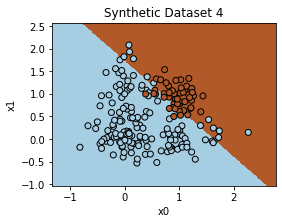

Logistic Regression with step_size: 0.05, stopping_criterion: 0.002 after 357 iterations and 13 milli seconds, training accuracy: 0.885




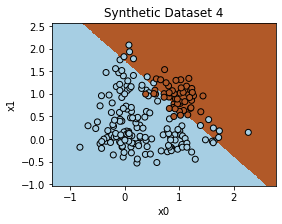

Logistic Regression with step_size: 0.05, stopping_criterion: 0.005 after 297 iterations and 11 milli seconds, training accuracy: 0.885




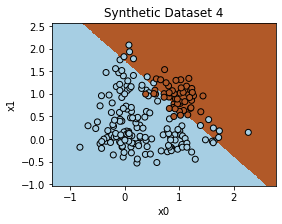

Logistic Regression with step_size: 0.05, stopping_criterion: 0.008 after 267 iterations and 7 milli seconds, training accuracy: 0.885




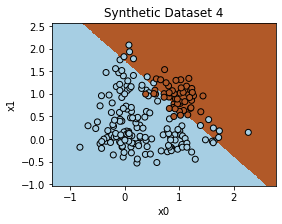

Logistic Regression with step_size: 0.05, stopping_criterion: 0.01 after 253 iterations and 8 milli seconds, training accuracy: 0.885


Gradient Norm after 1000000 iterations: 35.90685000779053
Gradient Norm after 2000000 iterations: 35.90685000779053
Gradient Norm after 3000000 iterations: 35.90685000779053
Gradient Norm after 4000000 iterations: 35.90685000779053
Gradient Norm after 5000000 iterations: 35.90685000779053
Gradient Norm after 6000000 iterations: 35.90685000779053
Gradient Norm after 7000000 iterations: 35.90685000779053
Gradient Norm after 8000000 iterations: 35.90685000779053
Gradient Norm after 9000000 iterations: 35.90685000779053
Gradient Norm after 10000000 iterations: 35.90685000779053


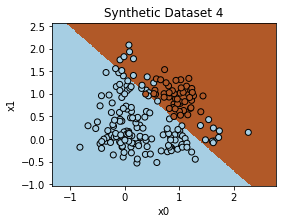

Logistic Regression with step_size: 0.1, stopping_criterion: 0.002 after 10000000 iterations and 246325 milli seconds, training accuracy: 0.875


Gradient Norm after 1000000 iterations: 35.90685000779053
Gradient Norm after 2000000 iterations: 35.90685000779053
Gradient Norm after 3000000 iterations: 35.90685000779053
Gradient Norm after 4000000 iterations: 35.90685000779053
Gradient Norm after 5000000 iterations: 35.90685000779053
Gradient Norm after 6000000 iterations: 35.90685000779053
Gradient Norm after 7000000 iterations: 35.90685000779053
Gradient Norm after 8000000 iterations: 35.90685000779053
Gradient Norm after 9000000 iterations: 35.90685000779053
Gradient Norm after 10000000 iterations: 35.90685000779053


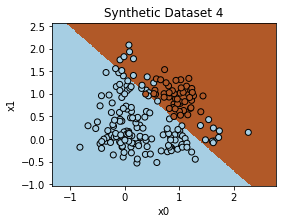

Logistic Regression with step_size: 0.1, stopping_criterion: 0.005 after 10000000 iterations and 237882 milli seconds, training accuracy: 0.875


Gradient Norm after 1000000 iterations: 35.90685000779053
Gradient Norm after 2000000 iterations: 35.90685000779053
Gradient Norm after 3000000 iterations: 35.90685000779053
Gradient Norm after 4000000 iterations: 35.90685000779053
Gradient Norm after 5000000 iterations: 35.90685000779053
Gradient Norm after 6000000 iterations: 35.90685000779053
Gradient Norm after 7000000 iterations: 35.90685000779053
Gradient Norm after 8000000 iterations: 35.90685000779053
Gradient Norm after 9000000 iterations: 35.90685000779053
Gradient Norm after 10000000 iterations: 35.90685000779053


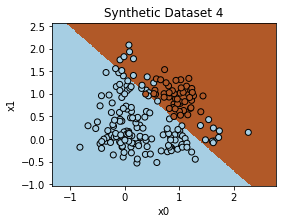

Logistic Regression with step_size: 0.1, stopping_criterion: 0.008 after 10000000 iterations and 237893 milli seconds, training accuracy: 0.875


Gradient Norm after 1000000 iterations: 35.90685000779053
Gradient Norm after 2000000 iterations: 35.90685000779053
Gradient Norm after 3000000 iterations: 35.90685000779053
Gradient Norm after 4000000 iterations: 35.90685000779053
Gradient Norm after 5000000 iterations: 35.90685000779053
Gradient Norm after 6000000 iterations: 35.90685000779053
Gradient Norm after 7000000 iterations: 35.90685000779053
Gradient Norm after 8000000 iterations: 35.90685000779053
Gradient Norm after 9000000 iterations: 35.90685000779053
Gradient Norm after 10000000 iterations: 35.90685000779053


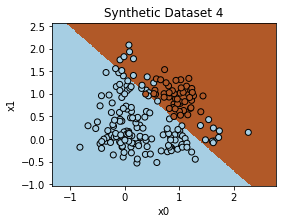

Logistic Regression with step_size: 0.1, stopping_criterion: 0.01 after 10000000 iterations and 236698 milli seconds, training accuracy: 0.875


Gradient Norm after 1000000 iterations: 42.03632410941721
Gradient Norm after 2000000 iterations: 42.03632410941721
Gradient Norm after 3000000 iterations: 42.03632410941721
Gradient Norm after 4000000 iterations: 42.03632410941721
Gradient Norm after 5000000 iterations: 42.03632410941721
Gradient Norm after 6000000 iterations: 42.03632410941721
Gradient Norm after 7000000 iterations: 42.03632410941721
Gradient Norm after 8000000 iterations: 42.03632410941721
Gradient Norm after 9000000 iterations: 42.03632410941721
Gradient Norm after 10000000 iterations: 42.03632410941721


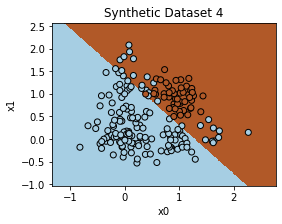

Logistic Regression with step_size: 0.5, stopping_criterion: 0.002 after 10000000 iterations and 238504 milli seconds, training accuracy: 0.865


Gradient Norm after 1000000 iterations: 42.03632410941721
Gradient Norm after 2000000 iterations: 42.03632410941721
Gradient Norm after 3000000 iterations: 42.03632410941721
Gradient Norm after 4000000 iterations: 42.03632410941721
Gradient Norm after 5000000 iterations: 42.03632410941721
Gradient Norm after 6000000 iterations: 42.03632410941721
Gradient Norm after 7000000 iterations: 42.03632410941721
Gradient Norm after 8000000 iterations: 42.03632410941721
Gradient Norm after 9000000 iterations: 42.03632410941721
Gradient Norm after 10000000 iterations: 42.03632410941721


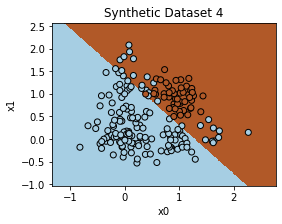

Logistic Regression with step_size: 0.5, stopping_criterion: 0.005 after 10000000 iterations and 238033 milli seconds, training accuracy: 0.865


Gradient Norm after 1000000 iterations: 42.03632410941721
Gradient Norm after 2000000 iterations: 42.03632410941721
Gradient Norm after 3000000 iterations: 42.03632410941721
Gradient Norm after 4000000 iterations: 42.03632410941721
Gradient Norm after 5000000 iterations: 42.03632410941721
Gradient Norm after 6000000 iterations: 42.03632410941721
Gradient Norm after 7000000 iterations: 42.03632410941721
Gradient Norm after 8000000 iterations: 42.03632410941721
Gradient Norm after 9000000 iterations: 42.03632410941721
Gradient Norm after 10000000 iterations: 42.03632410941721


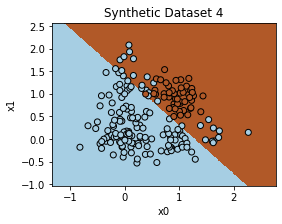

Logistic Regression with step_size: 0.5, stopping_criterion: 0.008 after 10000000 iterations and 237975 milli seconds, training accuracy: 0.865


Gradient Norm after 1000000 iterations: 42.03632410941721
Gradient Norm after 2000000 iterations: 42.03632410941721
Gradient Norm after 3000000 iterations: 42.03632410941721
Gradient Norm after 4000000 iterations: 42.03632410941721
Gradient Norm after 5000000 iterations: 42.03632410941721
Gradient Norm after 6000000 iterations: 42.03632410941721
Gradient Norm after 7000000 iterations: 42.03632410941721
Gradient Norm after 8000000 iterations: 42.03632410941721
Gradient Norm after 9000000 iterations: 42.03632410941721
Gradient Norm after 10000000 iterations: 42.03632410941721


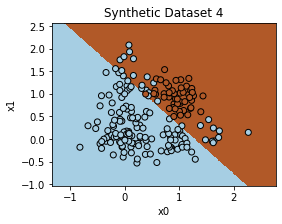

Logistic Regression with step_size: 0.5, stopping_criterion: 0.01 after 10000000 iterations and 238030 milli seconds, training accuracy: 0.865


Gradient Norm after 1000000 iterations: 42.218315266421435
Gradient Norm after 2000000 iterations: 42.218315266421435
Gradient Norm after 3000000 iterations: 42.218315266421435
Gradient Norm after 4000000 iterations: 42.218315266421435
Gradient Norm after 5000000 iterations: 42.218315266421435
Gradient Norm after 6000000 iterations: 42.218315266421435
Gradient Norm after 7000000 iterations: 42.218315266421435
Gradient Norm after 8000000 iterations: 42.218315266421435
Gradient Norm after 9000000 iterations: 42.218315266421435
Gradient Norm after 10000000 iterations: 42.218315266421435


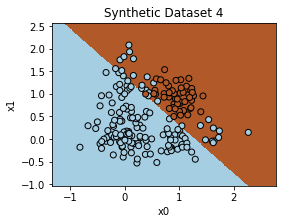

Logistic Regression with step_size: 1, stopping_criterion: 0.002 after 10000000 iterations and 237911 milli seconds, training accuracy: 0.865


Gradient Norm after 1000000 iterations: 42.218315266421435
Gradient Norm after 2000000 iterations: 42.218315266421435
Gradient Norm after 3000000 iterations: 42.218315266421435
Gradient Norm after 4000000 iterations: 42.218315266421435
Gradient Norm after 5000000 iterations: 42.218315266421435
Gradient Norm after 6000000 iterations: 42.218315266421435
Gradient Norm after 7000000 iterations: 42.218315266421435
Gradient Norm after 8000000 iterations: 42.218315266421435
Gradient Norm after 9000000 iterations: 42.218315266421435
Gradient Norm after 10000000 iterations: 42.218315266421435


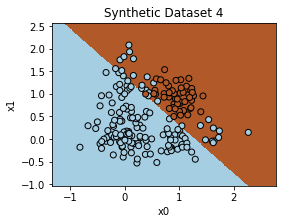

Logistic Regression with step_size: 1, stopping_criterion: 0.005 after 10000000 iterations and 239293 milli seconds, training accuracy: 0.865


Gradient Norm after 1000000 iterations: 42.218315266421435
Gradient Norm after 2000000 iterations: 42.218315266421435
Gradient Norm after 3000000 iterations: 42.218315266421435
Gradient Norm after 4000000 iterations: 42.218315266421435
Gradient Norm after 5000000 iterations: 42.218315266421435
Gradient Norm after 6000000 iterations: 42.218315266421435
Gradient Norm after 7000000 iterations: 42.218315266421435
Gradient Norm after 8000000 iterations: 42.218315266421435
Gradient Norm after 9000000 iterations: 42.218315266421435
Gradient Norm after 10000000 iterations: 42.218315266421435


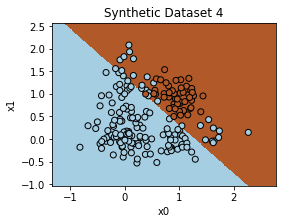

Logistic Regression with step_size: 1, stopping_criterion: 0.008 after 10000000 iterations and 238708 milli seconds, training accuracy: 0.865


Gradient Norm after 1000000 iterations: 42.218315266421435
Gradient Norm after 2000000 iterations: 42.218315266421435
Gradient Norm after 3000000 iterations: 42.218315266421435
Gradient Norm after 4000000 iterations: 42.218315266421435
Gradient Norm after 5000000 iterations: 42.218315266421435
Gradient Norm after 6000000 iterations: 42.218315266421435
Gradient Norm after 7000000 iterations: 42.218315266421435
Gradient Norm after 8000000 iterations: 42.218315266421435
Gradient Norm after 9000000 iterations: 42.218315266421435
Gradient Norm after 10000000 iterations: 42.218315266421435


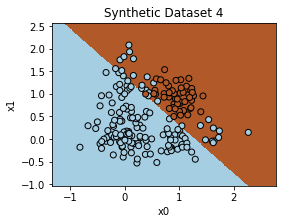

Logistic Regression with step_size: 1, stopping_criterion: 0.01 after 10000000 iterations and 238410 milli seconds, training accuracy: 0.865










In [4]:
for ind in range(1, 5):
    print("Classification Results for Synthetic Dataset {}\n".format(ind))
    synthetic_data = loadmat('data/synthetic{}.mat'.format(ind))
    X = synthetic_data['X'].transpose()
    Y = synthetic_data['Y'].reshape(-1)

    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

    for lr in [0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1]:
        for stop_threshold in [0.002, 0.005, 0.008, 0.01]:
            begin = time.time()
            lr_model = LR(step_size=lr, max_epochs=10000000, stopping_threshold=stop_threshold, optimizer='bgd')
            lr_model.fit(X, Y)
            y_pred = lr_model.predict(X)
            end = time.time()

            x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
            y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
            h = 0.01
            xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
            Z = lr_model.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)
            plt.figure(1, figsize=(4, 3))
            plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

            plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors="k", cmap=plt.cm.Paired)
            plt.xlabel('x0')
            plt.ylabel('x1')

            plt.title('Synthetic Dataset {}'.format(ind))
            plt.show()

            print(
                "Logistic Regression with step_size: {}, stopping_criterion: {} after {} iterations and {} milli seconds, training accuracy: {}\n\n".format(
                    lr, stop_threshold, lr_model.step, int(1000 * (end - begin)), accuracy_score(Y, y_pred)))
    print("\n\n\n\n\n")

## Problem 1 continued
b. For the linearly separable data (synthetic dataset 1) both LDA and LR (we consider the best
setting that converges) achieve a training accuracy of 1.0.

Also, for synthetic dataset 2, in which the classes are a bit overlapped, both LDA and LR achieve an accuracy
of 0.98.

For synthetic dataset 3, too, both algorithms have the same performance, i.e. an accuracy of 0.82.

This shows by using LR we achieve the same accuracy even though we are estimating much fewer parameters compared to LDA.
Thus, our assumption that we might not need estimate the joint distribution of X,Y is correct. In fact, as expected
we only need to estimate P[Y|X] to have a classifier and the use the Bayes decision Rule.

c.  What is interesting is that for linearly separable data the algorithm seems not to converge (if we don't set the gradient norm
threshold or the max epochs). This is because on linearly separable data there are infinitely many solutions
give complete separation and an accuracy of 1.0. The model parameter go to infinity to ensure that the logistic
function accurately approximates the heaviside function (an ideal scenario). Thus, for linearly separable data
the logistic regression never converges (if we give it enough time). We are maximizing the log likelihood,
and in the case of linearly separable data, the likelihood goes to infinity, i.e. there is always a better value, a
better separating hyperplane and that is why LR never converges.

This is not the case for overlapped data. In that case LR converges fast as the Likelihood does not go to infinity and model
parameters changes are stopped after a moderate number of iterations.

Besides, as expected, for very small values of the step size together with small values of the stopping criterion, training takes much longer to converge. This is
because at each step a minor modification is made to the weight vector. As step size gets larger, training is
faster and the algorithm converges sooner. For very large values of the step size, the algorithm might fail
to converge as it might overshoot the local (in this case global) minimum.


## Problem 2
Here we test our implementation of LR with Newton's method as optimizer.

Classification Results for Synthetic Dataset 1



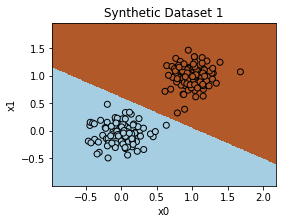

Logistic Regression with stopping_criteria: 0.0001 after 15 iterations and 23 milli seconds, training accuracy: 1.0




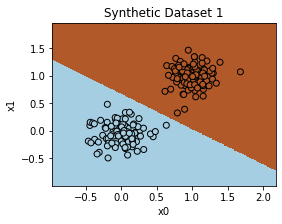

Logistic Regression with stopping_criteria: 0.005 after 11 iterations and 22 milli seconds, training accuracy: 1.0




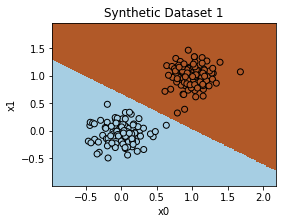

Logistic Regression with stopping_criteria: 0.008 after 10 iterations and 13 milli seconds, training accuracy: 1.0




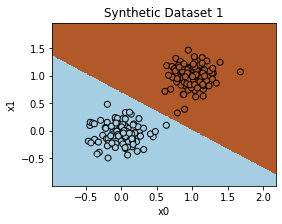

Logistic Regression with stopping_criteria: 0.01 after 10 iterations and 13 milli seconds, training accuracy: 1.0


Classification Results for Synthetic Dataset 2



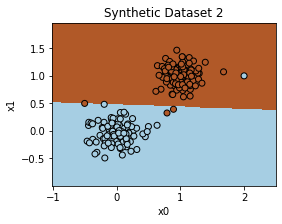

Logistic Regression with stopping_criteria: 0.0001 after 8 iterations and 20 milli seconds, training accuracy: 0.98




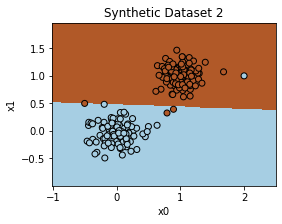

Logistic Regression with stopping_criteria: 0.005 after 7 iterations and 17 milli seconds, training accuracy: 0.98




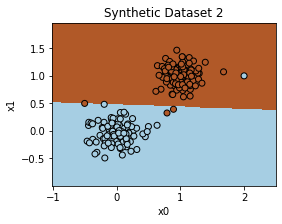

Logistic Regression with stopping_criteria: 0.008 after 7 iterations and 10 milli seconds, training accuracy: 0.98




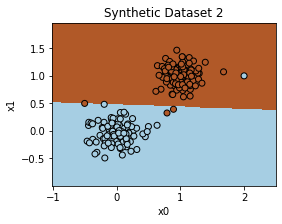

Logistic Regression with stopping_criteria: 0.01 after 7 iterations and 9 milli seconds, training accuracy: 0.98


Classification Results for Synthetic Dataset 3



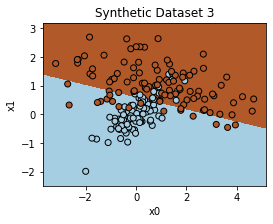

Logistic Regression with stopping_criteria: 0.0001 after 7 iterations and 11 milli seconds, training accuracy: 0.825




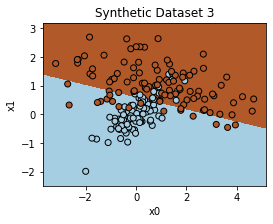

Logistic Regression with stopping_criteria: 0.005 after 5 iterations and 11 milli seconds, training accuracy: 0.825




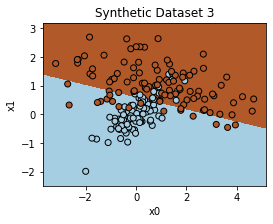

Logistic Regression with stopping_criteria: 0.008 after 5 iterations and 7 milli seconds, training accuracy: 0.825




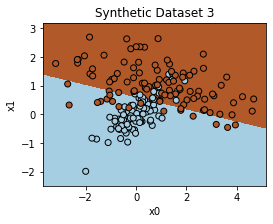

Logistic Regression with stopping_criteria: 0.01 after 5 iterations and 7 milli seconds, training accuracy: 0.825


Classification Results for Synthetic Dataset 4



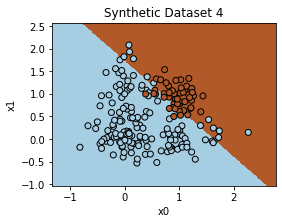

Logistic Regression with stopping_criteria: 0.0001 after 7 iterations and 9 milli seconds, training accuracy: 0.885




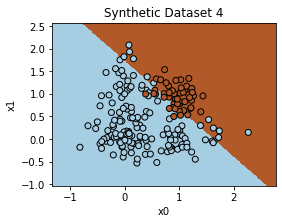

Logistic Regression with stopping_criteria: 0.005 after 7 iterations and 9 milli seconds, training accuracy: 0.885




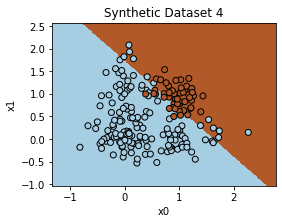

Logistic Regression with stopping_criteria: 0.008 after 7 iterations and 9 milli seconds, training accuracy: 0.885




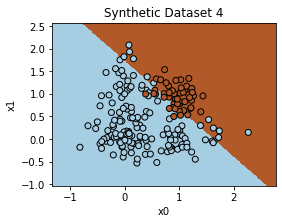

Logistic Regression with stopping_criteria: 0.01 after 7 iterations and 8 milli seconds, training accuracy: 0.885










In [18]:
for ind in range(1, 5):
    print("Classification Results for Synthetic Dataset {}\n".format(ind))
    synthetic_data = loadmat('data/synthetic{}.mat'.format(ind))
    X = synthetic_data['X'].transpose()
    Y = synthetic_data['Y'].reshape(-1)
    for stop_threshold in [0.0001, 0.005, 0.008, 0.01]:
        begin = time.time()
        lr_model = LR(max_epochs=10000000, stopping_threshold=stop_threshold, optimizer='newton')
        lr_model.fit(X, Y)
        y_pred = lr_model.predict(X)
        end = time.time()

        x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
        y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
        h = 0.01
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
        Z = lr_model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.figure(1, figsize=(4, 3))
        plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

        plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors="k", cmap=plt.cm.Paired)
        plt.xlabel('x0')
        plt.ylabel('x1')

        plt.title('Synthetic Dataset {}'.format(ind))
        plt.show()

        print(
            "Logistic Regression with stopping_criteria: {} after {} iterations and {} milli seconds, training accuracy: {}\n\n".format(
                stop_threshold, lr_model.step, int(1000 * (end - begin)), accuracy_score(Y, y_pred)))
print("\n\n\n\n\n")

We see that the algorithm converges extremely faster! This was expected as the newton's method finds the right
direction together with the right step size. Also, we see that the resulting classifier is identical to the previous
section.



## Problem 3

Here we reduce the number of settings because of the long time each run takes to complete.

Classification Results for Synthetic Dataset 1

Gradient Norm after 1000000 iterations: 0.002232243229886603


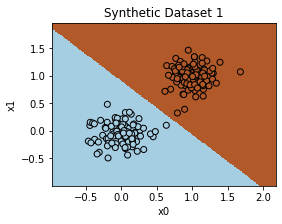

Logistic Regression with step_size: 0.0005, stopping_criteria: 0.0001 after 1084612 iterations and 54440 milli seconds, training accuracy: 1.0




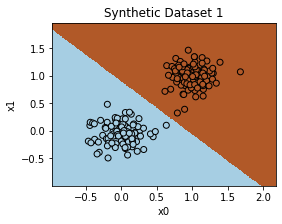

Logistic Regression with step_size: 0.001, stopping_criteria: 0.0001 after 543772 iterations and 27146 milli seconds, training accuracy: 1.0




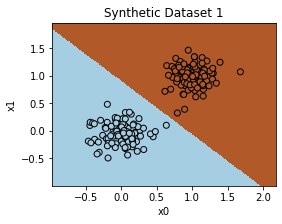

Logistic Regression with step_size: 0.01, stopping_criteria: 0.0001 after 55130 iterations and 2915 milli seconds, training accuracy: 1.0




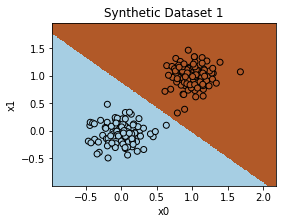

Logistic Regression with step_size: 0.5, stopping_criteria: 0.0001 after 1154 iterations and 70 milli seconds, training accuracy: 1.0




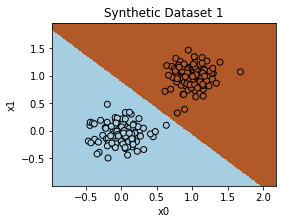

Logistic Regression with step_size: 1, stopping_criteria: 0.0001 after 674 iterations and 39 milli seconds, training accuracy: 1.0








Classification Results for Synthetic Dataset 2

Gradient Norm after 1000000 iterations: 0.017470625089352362
Gradient Norm after 2000000 iterations: 0.043643576358365285
Gradient Norm after 3000000 iterations: 0.011303998858928656


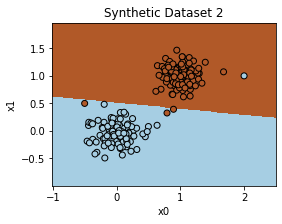

Logistic Regression with step_size: 0.0005, stopping_criteria: 0.0001 after 3674552 iterations and 195273 milli seconds, training accuracy: 0.98


Gradient Norm after 1000000 iterations: 0.029171461456693373


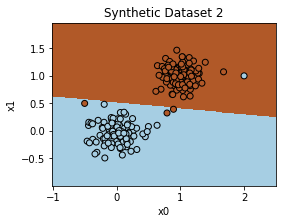

Logistic Regression with step_size: 0.001, stopping_criteria: 0.0001 after 1828267 iterations and 95327 milli seconds, training accuracy: 0.98




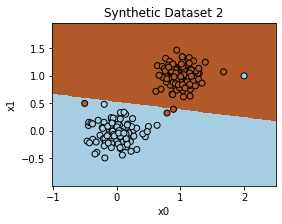

Logistic Regression with step_size: 0.01, stopping_criteria: 0.0001 after 175897 iterations and 9709 milli seconds, training accuracy: 0.98




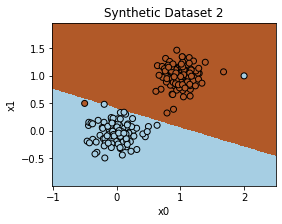

Logistic Regression with step_size: 0.5, stopping_criteria: 0.0001 after 1467 iterations and 89 milli seconds, training accuracy: 0.985




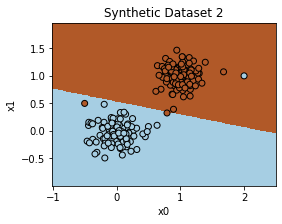

Logistic Regression with step_size: 1, stopping_criteria: 0.0001 after 1392 iterations and 88 milli seconds, training accuracy: 0.985








Classification Results for Synthetic Dataset 3

Gradient Norm after 1000000 iterations: 0.0944237291432502
Gradient Norm after 2000000 iterations: 0.06034845531466062
Gradient Norm after 3000000 iterations: 0.3138720894421116
Gradient Norm after 4000000 iterations: 0.028509811490601892
Gradient Norm after 5000000 iterations: 0.2544319385407112
Gradient Norm after 6000000 iterations: 0.16660669643437995
Gradient Norm after 7000000 iterations: 0.31810924358991693
Gradient Norm after 8000000 iterations: 0.519796234609697
Gradient Norm after 9000000 iterations: 0.2816590105801435
Gradient Norm after 10000000 iterations: 0.007742917467777841


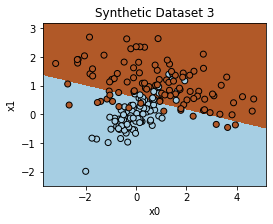

Logistic Regression with step_size: 0.0005, stopping_criteria: 0.0001 after 10000000 iterations and 536677 milli seconds, training accuracy: 0.825


Gradient Norm after 1000000 iterations: 0.6838550835561548
Gradient Norm after 2000000 iterations: 0.30397231253345386
Gradient Norm after 3000000 iterations: 0.3480907421704183
Gradient Norm after 4000000 iterations: 0.240485248916254
Gradient Norm after 5000000 iterations: 0.1800133284180103
Gradient Norm after 6000000 iterations: 0.42230982317527116
Gradient Norm after 7000000 iterations: 0.4168718188563198
Gradient Norm after 8000000 iterations: 0.22618568618002324
Gradient Norm after 9000000 iterations: 0.23617074560734144
Gradient Norm after 10000000 iterations: 0.258041832472844


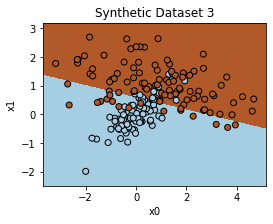

Logistic Regression with step_size: 0.001, stopping_criteria: 0.0001 after 10000000 iterations and 520070 milli seconds, training accuracy: 0.825


Gradient Norm after 1000000 iterations: 0.008297634453933698
Gradient Norm after 2000000 iterations: 0.3037168510980111
Gradient Norm after 3000000 iterations: 0.06494253376393865
Gradient Norm after 4000000 iterations: 0.21076489359922496
Gradient Norm after 5000000 iterations: 0.4162230054534148
Gradient Norm after 6000000 iterations: 0.19208867375601585
Gradient Norm after 7000000 iterations: 0.38330502866109595
Gradient Norm after 8000000 iterations: 0.02544013452105758
Gradient Norm after 9000000 iterations: 0.452712665955338
Gradient Norm after 10000000 iterations: 0.4823445929156804


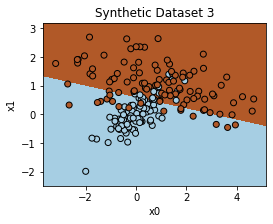

Logistic Regression with step_size: 0.01, stopping_criteria: 0.0001 after 10000000 iterations and 516126 milli seconds, training accuracy: 0.83




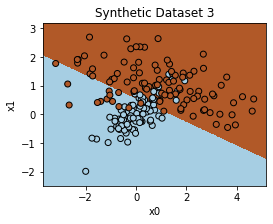

Logistic Regression with step_size: 0.5, stopping_criteria: 0.0001 after 154 iterations and 9 milli seconds, training accuracy: 0.83




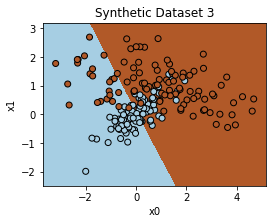

Logistic Regression with step_size: 1, stopping_criteria: 0.0001 after 14 iterations and 1 milli seconds, training accuracy: 0.66








Classification Results for Synthetic Dataset 4



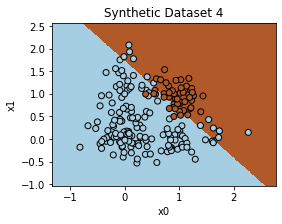

Logistic Regression with step_size: 0.0005, stopping_criteria: 0.0001 after 598618 iterations and 29993 milli seconds, training accuracy: 0.885




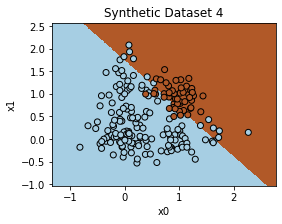

Logistic Regression with step_size: 0.001, stopping_criteria: 0.0001 after 305330 iterations and 15329 milli seconds, training accuracy: 0.88




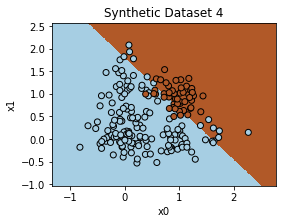

Logistic Regression with step_size: 0.01, stopping_criteria: 0.0001 after 30544 iterations and 1710 milli seconds, training accuracy: 0.875




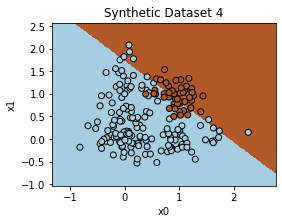

Logistic Regression with step_size: 0.5, stopping_criteria: 0.0001 after 832 iterations and 49 milli seconds, training accuracy: 0.865




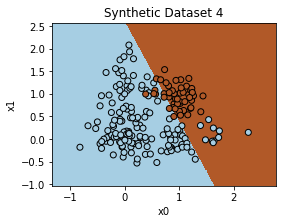

Logistic Regression with step_size: 1, stopping_criteria: 0.0001 after 357 iterations and 21 milli seconds, training accuracy: 0.905










In [3]:
for ind in range(1, 5):
    print("Classification Results for Synthetic Dataset {}\n".format(ind))
    synthetic_data = loadmat('data/synthetic{}.mat'.format(ind))
    X = synthetic_data['X'].transpose()
    Y = synthetic_data['Y'].reshape(-1)
    for lr in [0.0005, 0.001, 0.01, 0.5, 1]:
        begin = time.time()
        lr_model = LR(step_size=lr, max_epochs=10000000, stopping_threshold=0.0001, optimizer='sgd')
        lr_model.fit(X, Y)
        y_pred = lr_model.predict(X)
        end = time.time()

        x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
        y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
        h = 0.01
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
        Z = lr_model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.figure(1, figsize=(4, 3))
        plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

        plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors="k", cmap=plt.cm.Paired)
        plt.xlabel('x0')
        plt.ylabel('x1')

        plt.title('Synthetic Dataset {}'.format(ind))
        plt.show()

        print(
            "Logistic Regression with step_size: {}, stopping_criteria: {} after {} iterations and {} milli seconds, training accuracy: {}\n\n".format(
                lr, lr_model.stopping_threshold, lr_model.step, int(1000 * (end - begin)), accuracy_score(Y, y_pred)))
    print("\n\n\n\n\n")


We see that gradient descent takes much longer to converge, sometimes not converging (not falling below the
threshold) even after 10000000 steps. This is because in stochastic gradient descent the steps taken are
very small and not smooth. But on the bright side, we see that the algorithm performs well, and the resulting
 classifiers are quite similar to the previous sections after enough time steps. So in case of limited
resources, we can achieve less memory consumption and faster iterations in trade for a lower convergence rate.